In [1]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import cifar10
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

from tensorflow.keras.models import load_model

model3 = load_model('E:/model_n10/my_modelResnet.h5')



In [2]:

# CIFAR-10 classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
               
# Define class names
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']




In [3]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

from sklearn.model_selection import train_test_split

# Preprocess input images
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Preprocess input images using ResNet50 preprocessing
x_train = tf.keras.applications.resnet50.preprocess_input(x_train)
x_test = tf.keras.applications.resnet50.preprocess_input(x_test)

from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.1)

from keras.utils import to_categorical

#One hot encode the labels.Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10

y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)


from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Data Augmentation Function: Let's define an instance of the ImageDataGenerator class and set the parameters.
train_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.1,
    zoom_range=0.1,)

val_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.1,
    zoom_range=0.1,)

test_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.1,
    zoom_range=0.1,) 


import tensorflow as tf
from tensorflow.keras.applications import ResNet50  # Import ResNet50 model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout, BatchNormalization, UpSampling2D
from tensorflow.keras.models import Model

# Feature Extraction is performed by ResNet50 pretrained on imagenet weights. 
# Input size is 224 x 224.
inputs = tf.keras.layers.Input(shape=(32, 32, 3))

# Upsample the input image to match the size expected by ResNet50
resized_inputs = UpSampling2D(size=(7, 7))(inputs)


In [4]:
import numpy as np

# Load the numpy arrays from the saved files
predictions_resnet = np.load("E:/dataset1/predictions_resnet.npy")
predicted_labels_resnet = np.load("E:/dataset1/predicted_labels_resnet.npy")
trains_resnet = np.load("E:/dataset1/trains_resnet.npy")
train_labels_resnet = np.load("E:/dataset1/train_labels_resnet.npy")

# Displaying the shapes of the arrays
print(predictions_resnet.shape)
print(predicted_labels_resnet.shape)
print(trains_resnet.shape)
print(train_labels_resnet.shape)


(10000, 10)
(10000,)
(45000, 10)
(45000,)


In [5]:
# Create an empty dictionary to store predictions for all images
predictions_dict_all = {}

# Iterate over all images in the training set
for i in range(len(x_train)):
    true_label = class_names[y_train[i].argmax()]  # Get true label
    train_label_resnet = class_names[train_labels_resnet[i]]  # Get predicted label
    train_probabilities = trains_resnet[i]  # Get predicted probabilities
    
    # Get the image
    image = x_train[i][np.newaxis, ...]  # Reshape to add batch dimension
    
    # Store pixel coordinates and corresponding probabilities in the dictionary
    predictions_dict_all[i] = {
        'pixel_coordinates': image,
        'probabilities': train_probabilities,
        'true_label': true_label,
        'predicted_label': train_label_resnet
    }



In [6]:

# Organize data into arrays
pixel_coordinates_all_resnet = []
probabilities_all_resnet = []
true_label_all = []
predicted_label_all = []

for i in range(len(x_train)):
    true_label = class_names[y_train[i].argmax()]  # Get true label
    train_label_resnet = class_names[train_labels_resnet[i]]  # Get predicted label
    train_probabilities = trains_resnet[i]  # Get predicted probabilities
    
    # Store the normalized image and its predictions
    image = x_train[i][np.newaxis, ...]  # Reshape to add batch dimension
    
    # Flatten pixel coordinates and append to the list
    pixel_coordinates_flat = np.ravel(image)
    pixel_coordinates_all_resnet.append(pixel_coordinates_flat)
    
    # Store corresponding probabilities in the list
    probabilities_all_resnet.append(train_probabilities)
    
    # Store true and predicted labels
    true_label_all.append(true_label)
    predicted_label_all.append(train_label_resnet)

# Convert the lists to numpy arrays
pixel_coordinates_all_resnet = np.array(pixel_coordinates_all_resnet)
probabilities_all_resnet = np.array(probabilities_all_resnet)
true_label_all = np.array(true_label_all)
predicted_label_all = np.array(predicted_label_all)

# Print the shapes of the arrays
print("Shape of pixel_coordinates_all_resnet:", pixel_coordinates_all_resnet.shape)
print("Shape of probabilities_all_resnet:", probabilities_all_resnet.shape)
print("Shape of true_label_all:", true_label_all.shape)
print("Shape of predicted_label_all:", predicted_label_all.shape)


Shape of pixel_coordinates_all_resnet: (45000, 3072)
Shape of probabilities_all_resnet: (45000, 10)
Shape of true_label_all: (45000,)
Shape of predicted_label_all: (45000,)


In [51]:
from sklearn.decomposition import PCA
import numpy as np

# Initialize PCA
pca = PCA()

# Fit PCA to the data
pca.fit(pixel_coordinates_all_resnet)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Find the least k where cumulative variance is greater than 0.95
min_k = np.argmax(cumulative_variance_ratio > 0.95) + 1

print("The least k where variance will be greater than 0.95:", min_k)


The least k where variance will be greater than 0.95: 217


In [ ]:
# Select the first test image and ensure it is normalized
test_image = x_test[1]

# Flatten the test image to match the format of pixel_coordinates_all_resnet
test_image_flat = np.ravel(test_image)

# Calculate RMS distance between the test image and all training images
rms_distances = np.sqrt(np.mean((pixel_coordinates_all_resnet - test_image_flat) ** 2, axis=1))




In [7]:
x_test.shape


(10000, 32, 32, 3)

In [8]:
import pickle

file_path = r"E:\RMS3\RMS3.pickle"  # Make sure the file path is correct

# Load the dictionary from file
with open(file_path, 'rb') as f:
    RMS3 = pickle.load(f)

print("RMS3 loaded successfully from", file_path)

RMS3 loaded successfully from E:\RMS3\RMS3.pickle


In [9]:
import pickle

file_path = r"E:\RMS3\RMS3_MIN5_inverse.pickle"  # Make sure the file path is correct

# Load the dictionary from file
with open(file_path, 'rb') as f:
    RMS3_MIN5 = pickle.load(f)

print("RMS3 loaded successfully from", file_path)

RMS3 loaded successfully from E:\RMS3\RMS3_MIN5_inverse.pickle


In [10]:
# Initialize a new dictionary to store the results
Probability = {}

# Loop through each i from 0 to 9999
for i in range(10000): 
    indices = RMS3_MIN5[i]['indices']
    inverses = RMS3_MIN5[i]['inverses']
    
    # Initialize a list to store the weighted sums for each index j
    weighted_sums = []
    
    # Loop through each index j in the indices list
    for j in indices:
        probabilities_j = predictions_dict_all[j]['probabilities']
        
        # Calculate the weighted sum for this set of probabilities
        weighted_sum = sum(inverses[k] * probabilities_j for k in range(5) )
        
        # Append the result to the list
        weighted_sums.append(weighted_sum)
    
    # Store the result in the dictionary
    Probability[i] = weighted_sums

print("Completed calculation of weighted sums for all images.")



Completed calculation of weighted sums for all images.


In [11]:
inverses = RMS3_MIN5[3]['inverses']
inverses

[0.02978236618618046,
 0.026460629386758482,
 0.025128046695622176,
 0.024266809003113517,
 0.023608488010819356]

In [12]:
# Initialize a new dictionary to store the results
probability_dict = {}

# Loop through each i from 0 to 9999
for i in range(10000): 
    indices = RMS3_MIN5[i]['indices']
    inverses = RMS3_MIN5[i]['inverses']
    
    # Initialize a list to store the weighted sums for each index j
    weighted_sums = []
    
    # Loop through each index j in the indices list
    for j in indices:
        probabilities_j = predictions_dict_all[j]['probabilities']
        
        # Calculate the weighted sum for this set of probabilities
        weighted_sum = sum(inverses[k] * probabilities_j for k in range(5))
        
        # Append the result to the list
        weighted_sums.append(weighted_sum)
    
    # Store the result in the dictionary
    probability_dict[i] = weighted_sums

print("Completed calculation of weighted sums for all images.")


Completed calculation of weighted sums for all images.


In [13]:
# Initialize a new dictionary to store the results
probability_dict = {}

# Loop through each i from 0 to 9999
for i in range(10000): 
    indices = RMS3_MIN5[i]['indices']
    inverses = RMS3_MIN5[i]['inverses']
    
    # Initialize a list to store the weighted sums for each index j
    weighted_sums = []
    
    # Loop through each index j in the indices list
    for j in indices:
       
        
        # Calculate the weighted sum for this set of probabilities
        weighted_sum = sum(inverses[k] * predictions_dict_all[j]['probabilities'] for k in range(5))
        
        
    
    # Store the result in the dictionary
    probability_dict[i] = weighted_sum

print("Completed calculation of weighted sums for all images.")


Completed calculation of weighted sums for all images.


In [14]:
 probability_dict[35]

array([1.3745189e-05, 7.3743959e-06, 3.4885807e-04, 1.3276602e-06,
       7.5562137e-05, 9.2594664e-06, 1.6925992e-06, 9.5038503e-02,
       8.3585030e-07, 7.0686821e-07], dtype=float32)

In [15]:
# Initialize a new dictionary to store the results
probability_dict_normalized = {}

# Loop through each i from 0 to 9999
for i in range(10000): 
    probability_dict_n = probability_dict[i]/sum(probability_dict[i])
    # Store the result in the dictionary
    probability_dict_normalized[i] = probability_dict_n

print("Completed calculation of normalized vector.")

Completed calculation of normalized vector.


In [16]:
import numpy as np

# Initialize a new dictionary to store the results
max_probability_dict = {}

# Loop through each i from 0 to 9999
for i in range(10000): 
    # Get the normalized probability vector
    probability_vector = probability_dict_normalized[i]
    
    # Find the maximum probability and its index
    max_probability_index = np.argmax(probability_vector)
    max_probability = probability_vector[max_probability_index]
    
    # Store the original array, maximum probability, and its index
    max_probability_dict[i] = {
        'original_array': probability_dict_normalized[i],
        'max_probability': max_probability,
        'max_probability_index': max_probability_index
    }

print("Completed selection of maximal possibilities.")



Completed selection of maximal possibilities.


In [17]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

import numpy as np

# Initialize a new dictionary to store the results
max_probability_dict_with_labels = {}

# Loop through each i from 0 to 9999
for i in range(10000): 
    # Get the normalized probability vector
    probability_vector = probability_dict_normalized[i]
    
    # Find the maximum probability and its index
    max_probability_index = np.argmax(probability_vector)
    max_probability = probability_vector[max_probability_index]
    label_c = class_names[max_probability_index]
    # Store the original array, maximum probability, and its index
    max_probability_dict_with_labels[i] = {
        'original_array': probability_dict_normalized[i],
        'max_probability': max_probability,
        'max_probability_index': max_probability_index,
        'predicted_label': label_c
    }

print("Completed selection of maximal possibilities.")



Completed selection of maximal possibilities.


In [18]:
max_probability_dict_with_labels[3]['original_array']

array([4.1529329e-08, 1.1622062e-06, 6.9959560e-07, 1.5340771e-06,
       3.3465000e-07, 6.3480421e-08, 9.9999064e-01, 2.8491970e-08,
       5.3933945e-06, 1.2270856e-07], dtype=float32)

In [19]:
# Initialize an empty list to store the predicted labels
predicted_labels = []

# Iterate through max_probability_dict_with_labels to extract predicted labels
for i in range(10000):
    predicted_label = max_probability_dict_with_labels[i]['max_probability_index']
    predicted_labels.append(predicted_label)

# Convert the list to a NumPy array
import numpy as np
predicted_labels = np.array(predicted_labels)


In [20]:
y_test[180]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
y_test.shape


(10000, 10)

In [22]:
# 将 NumPy 数组转换为表示索引的列表
y_test_indices = [np.argmax(sample) for sample in y_test]



In [23]:
y_test_indices[180]

0

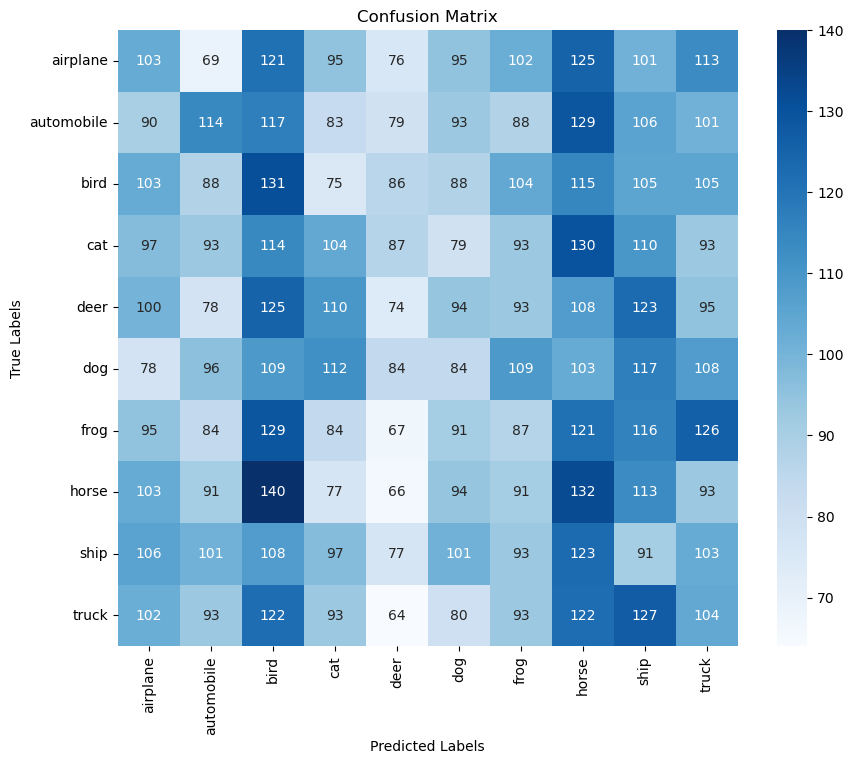

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_indices, predicted_labels)
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [25]:
conf_matrix

array([[103,  69, 121,  95,  76,  95, 102, 125, 101, 113],
       [ 90, 114, 117,  83,  79,  93,  88, 129, 106, 101],
       [103,  88, 131,  75,  86,  88, 104, 115, 105, 105],
       [ 97,  93, 114, 104,  87,  79,  93, 130, 110,  93],
       [100,  78, 125, 110,  74,  94,  93, 108, 123,  95],
       [ 78,  96, 109, 112,  84,  84, 109, 103, 117, 108],
       [ 95,  84, 129,  84,  67,  91,  87, 121, 116, 126],
       [103,  91, 140,  77,  66,  94,  91, 132, 113,  93],
       [106, 101, 108,  97,  77, 101,  93, 123,  91, 103],
       [102,  93, 122,  93,  64,  80,  93, 122, 127, 104]], dtype=int64)

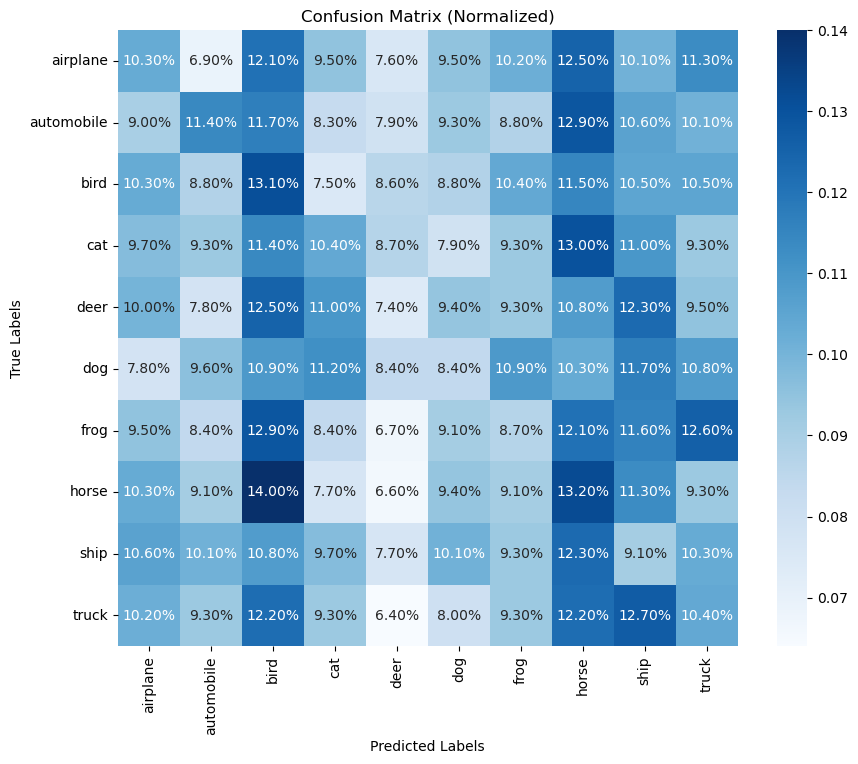

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix with normalization
conf_matrix = confusion_matrix(y_test_indices, predicted_labels, normalize='true')

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='.2%', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Normalized)')
plt.show()

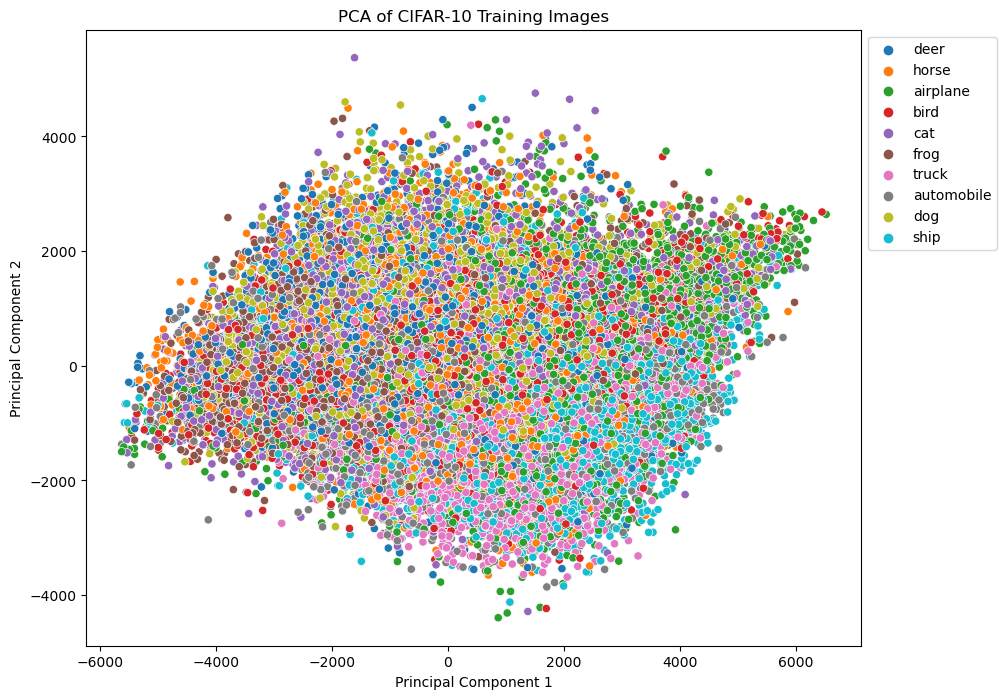

In [44]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Perform PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(pixel_coordinates_all_resnet)

# Create a DataFrame with the PCA results and labels
import pandas as pd

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['true_label'] = true_label_all

# Plotting the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='true_label', palette='tab10', legend='full')
plt.title('PCA of CIFAR-10 Training Images')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()


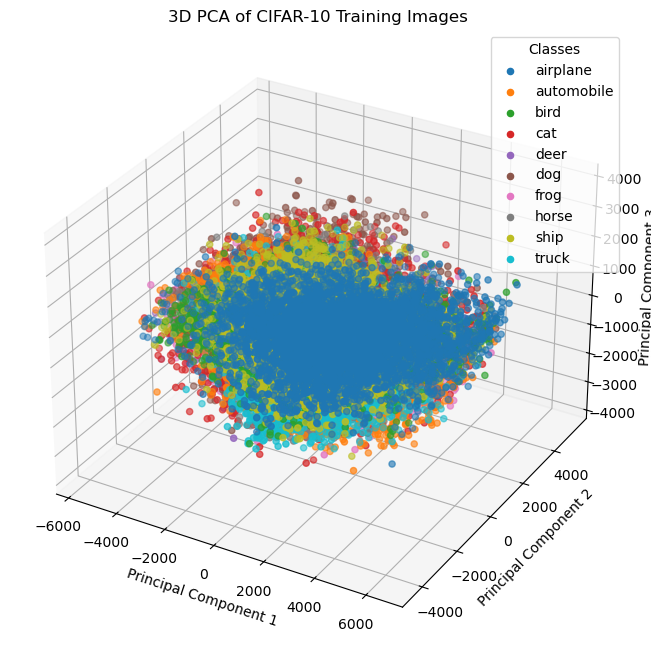

In [49]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# Perform PCA to reduce the dimensionality to 3 components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(pixel_coordinates_all_resnet)

# Create a DataFrame with the PCA results and labels
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
pca_df['true_label'] = true_label_all

# Plotting the PCA results in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each class separately to create a legend
for label in class_names:
    indices = pca_df[pca_df['true_label'] == label].index
    ax.scatter(pca_df.loc[indices, 'PC1'], pca_df.loc[indices, 'PC2'], pca_df.loc[indices, 'PC3'], label=label)

# Add a legend
ax.legend(title="Classes")

# Labels and title
ax.set_title('3D PCA of CIFAR-10 Training Images')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()


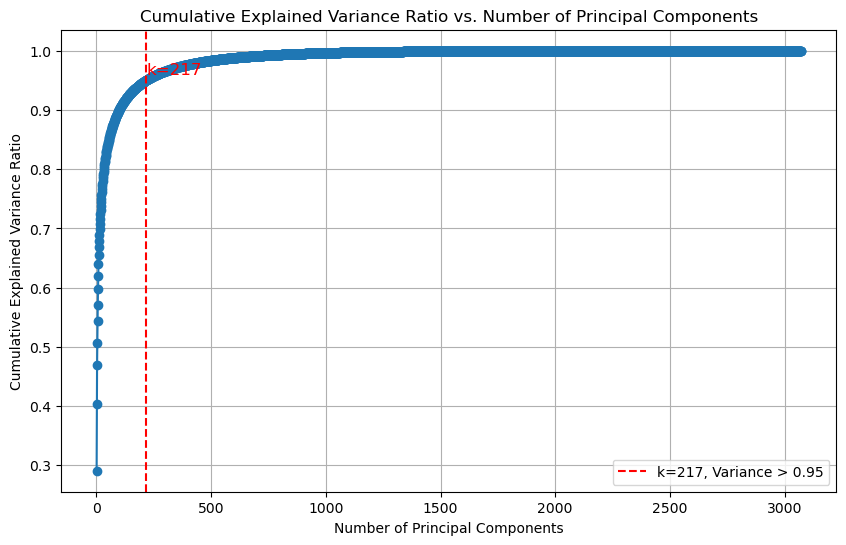

In [53]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Initialize PCA
pca = PCA()

# Fit PCA to the data
pca.fit(pixel_coordinates_all_resnet)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)

# Find the least k where variance will be greater than 0.95
min_k = np.argmax(cumulative_variance_ratio > 0.95) + 1

# Mark the value of k on the plot
plt.axvline(x=min_k, color='r', linestyle='--', label=f'k={min_k}, Variance > 0.95')
plt.text(min_k + 0.1, 0.96, f'k={min_k}', color='r', fontsize=12)

plt.legend()

plt.show()


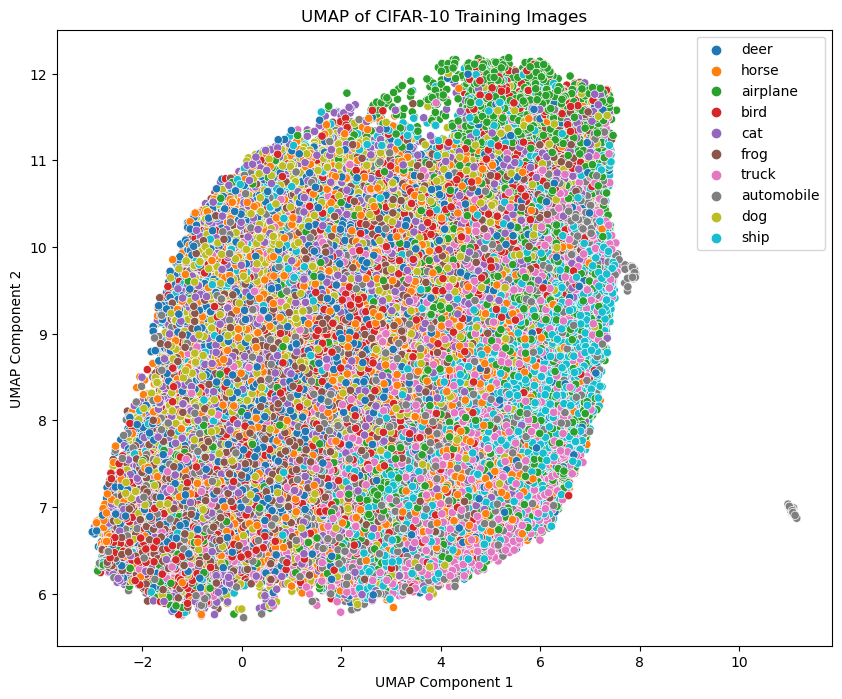

In [45]:
import umap
import pandas as pd

# Perform UMAP to reduce the dimensionality to 2 components
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_components = umap_reducer.fit_transform(pixel_coordinates_all_resnet)

# Create a DataFrame with the UMAP results and labels
umap_df = pd.DataFrame(data=umap_components, columns=['UMAP1', 'UMAP2'])
umap_df['true_label'] = true_label_all

# Plotting the UMAP results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', hue='true_label', palette='tab10', legend='full')
plt.title('UMAP of CIFAR-10 Training Images')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()


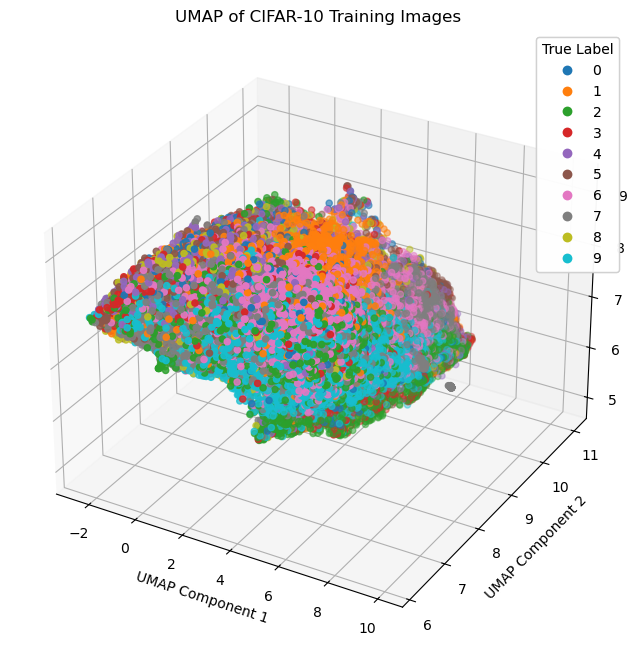

In [58]:
import umap
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Perform UMAP to reduce the dimensionality to 3 components
umap_reducer = umap.UMAP(n_components=3, random_state=42)
umap_components = umap_reducer.fit_transform(pixel_coordinates_all_resnet)

# Create a DataFrame with the UMAP results and labels
umap_df = pd.DataFrame(data=umap_components, columns=['UMAP1', 'UMAP2', 'UMAP3'])
umap_df['true_label'] = true_label_all

# Map categorical labels to numerical values
label_map = {label: i for i, label in enumerate(umap_df['true_label'].unique())}
umap_df['label_numeric'] = umap_df['true_label'].map(label_map)

# Plotting the UMAP results in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(umap_df['UMAP1'], umap_df['UMAP2'], umap_df['UMAP3'], c=umap_df['label_numeric'], cmap='tab10')

# Adding labels and legend
ax.set_title('UMAP of CIFAR-10 Training Images')
ax.set_xlabel('UMAP Component 1')
ax.set_ylabel('UMAP Component 2')
ax.set_zlabel('UMAP Component 3')
legend = ax.legend(*scatter.legend_elements(), title='True Label', loc='best', bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.show()
